In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import to_categorical

import csv
import random
import pickle

Using TensorFlow backend.


In [2]:
# 106 columns

X_train = []
Y_train = []

with open('data/X_train.csv', 'rt', encoding='big5') as csvfile:
    reader = csv.reader(csvfile)
    row1 = next(reader) # skip headings
    for idx, row in enumerate(reader):
        X_train.append([float(i) for i in row] + [1.0])

X_train = np.array(X_train)
for col in [0,1,3,4,5]: # [0,1,3,4,5] only, shouldn't normalize one-hot columns, will be affected by data
    if np.std(X_train[:,col]) != 0:
        X_train[:,col] = np.divide((X_train[:,col] - np.average(X_train[:,col])), np.std(X_train[:,col]))
# [[data1]
#  [data2]]

with open('data/Y_train.csv', 'rt', encoding='big5') as csvfile:
    reader = csv.reader(csvfile)
    row1 = next(reader) # skip headings
    for idx, row in enumerate(reader):
        Y_train.append(float(row[0]))

Y_train = np.array(Y_train)
# Y_train = to_categorical(Y_train, num_classes=2)
# [[y1]
#  [y2]]


In [3]:
'''print(len(X_train[0]))
print(Y_train[0:10])'''

'print(len(X_train[0]))\nprint(Y_train[0:10])'

In [93]:
class LossHistory(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)


def load_data():
    print('Loading data...')
    # (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    # in future, use Keras to get validation split (I already implemented in hw2_logistic)
    val_idxs = random.sample(range(0, len(X_train)), int(len(X_train) * 0.2))
    X_valid = X_train[val_idxs,:]
    Y_valid = Y_train[val_idxs]
    
    X_train_real = np.delete(X_train, val_idxs, axis=0)
    Y_train_real = np.delete(Y_train, val_idxs)
    
    X_train_real = X_train_real.astype('float32')
    Y_train_real = Y_train_real.astype('float32')
    X_valid = X_valid.astype('float32')
    Y_valid = Y_valid.astype('float32')

    print('Data loaded.')
    return [X_train_real, X_valid, Y_train_real, Y_valid]


def init_model():
    start_time = time.time()
    print('Compiling Model ... ')
    # mark I
    '''model = Sequential()
    model.add(Dense(100, input_dim=107)) ########################
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100))
    model.add(Dropout(0.2))
    model.add(Activation('relu'))
    model.add(Dense(4))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))'''
    # mark II
    model = Sequential()
    model.add(Dense(120, input_dim=107)) ########################
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print('Model compiled in {0} seconds'.format(time.time() - start_time))
    return model


def run_network(data=None, model=None, epochs=50, batch=100):
    try:
        start_time = time.time()
        if data is None:
            X_train_real, X_valid, Y_train_real, Y_valid = load_data()
        else:
            X_train_real, X_valid, Y_train_real, Y_valid = data

        if model is None:
            model = init_model()

        history = LossHistory()

        print('Training model...')
        model.fit(X_train_real, Y_train_real, nb_epoch=epochs, batch_size=batch,
                  callbacks=[history],
                  validation_data=(X_valid, Y_valid), verbose=2)

        print("Training duration : {0}".format(time.time() - start_time))
        score = model.evaluate(X_valid, Y_valid, batch_size=1) # what is this batch_size?

        print("Network's test score [loss, accuracy]: {0}".format(score))
        return model, history.losses
    except KeyboardInterrupt:
        print('KeyboardInterrupt')
        return model, history.losses


def plot_losses(losses):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(losses)
    ax.set_title('Loss per batch')
    fig.show()

In [19]:
X_train_real, X_valid, Y_train_real, Y_valid = load_data()

Loading data...
Data loaded.


Loading data...
Data loaded.
Compiling Model ... 
Model compiled in 0.07993006706237793 seconds
Training model...


/usr/local/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 26049 samples, validate on 6512 samples
Epoch 1/20
0s - loss: 0.4388 - acc: 0.7887 - val_loss: 0.3320 - val_acc: 0.8484
Epoch 2/20
0s - loss: 0.3272 - acc: 0.8489 - val_loss: 0.3138 - val_acc: 0.8567
Epoch 3/20
0s - loss: 0.3146 - acc: 0.8534 - val_loss: 0.3116 - val_acc: 0.8543
Epoch 4/20
0s - loss: 0.3103 - acc: 0.8555 - val_loss: 0.3084 - val_acc: 0.8609
Epoch 5/20
0s - loss: 0.3068 - acc: 0.8567 - val_loss: 0.3072 - val_acc: 0.8592
Epoch 6/20
0s - loss: 0.3045 - acc: 0.8578 - val_loss: 0.3069 - val_acc: 0.8589
Epoch 7/20
0s - loss: 0.3029 - acc: 0.8583 - val_loss: 0.3062 - val_acc: 0.8616
Epoch 8/20
0s - loss: 0.3013 - acc: 0.8587 - val_loss: 0.3057 - val_acc: 0.8604
Epoch 9/20
0s - loss: 0.2996 - acc: 0.8605 - val_loss: 0.3050 - val_acc: 0.8613
Epoch 10/20
0s - loss: 0.2986 - acc: 0.8610 - val_loss: 0.3062 - val_acc: 0.8598
Epoch 11/20
0s - loss: 0.2972 - acc: 0.8617 - val_loss: 0.3049 - val_acc: 0.8598
Epoch 12/20
0s - loss: 0.2969 - acc: 0.8624 - val_loss: 0.3060 - val_

/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


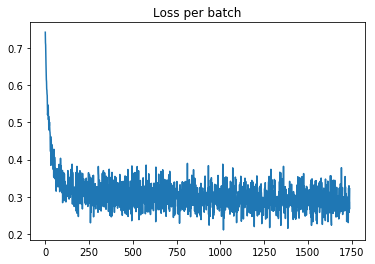

In [96]:
model, losses = run_network(epochs=20, batch=300) #batch200, 0.85  batch300, 0.8467
plot_losses(losses)

In [97]:
X_test = []

with open('data/X_test.csv', 'rt', encoding='big5') as infile:
    reader = csv.reader(infile)

    row1 = next(reader) # skip headings
    for row in reader:
        X_test.append([float(i) for i in row] + [1.0])
            
X_test = np.array(X_test)
for col in [0,1,3,4,5]:
    if np.std(X_test[:,col]) != 0:
        X_test[:,col] = np.divide((X_test[:,col] - np.average(X_test[:,col])), np.std(X_test[:,col]))

pred = model.predict(X_test, batch_size=1)
pred = np.around(pred).flatten()
# print(pred[0:100])

with open('data/submission_nn.csv', 'wt') as outfile:
    test_writer = csv.writer(outfile)
    test_writer.writerow(['id','label'])
    
    counter = 0
    for num in pred:
        counter += 1
        test_writer.writerow([str(counter),int(num)])
    
print('done!')

done!


In [98]:
model.save('nn_model.h5')